In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder()
sc = StandardScaler()

In [51]:
train = pd.read_csv("train.csv")
train.head()

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


In [6]:
test = pd.read_csv("test.csv")

In [7]:
train.shape,test.shape

((39499, 15), (10500, 14))

In [8]:
print(train.isnull().sum())
print()
print(test.isnull().sum())

Property_ID                  0
Property_Type                0
Property_Area                0
Number_of_Windows         1654
Number_of_Doors              0
Furnishing                1042
Frequency_of_Powercuts    1383
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 787
Dust_and_Noise            1219
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64

Property_ID                 0
Property_Type               0
Property_Area               0
Number_of_Windows         445
Number_of_Doors             0
Furnishing                257
Frequency_of_Powercuts    366
Power_Backup                0
Water_Supply                0
Traffic_Density_Score       0
Crime_Rate                212
Dust_and_Noise            330
Air_Quality_Index           0
Neighborhood_Review         0
dtype: int64


In [9]:
y = train.iloc[:,-1]
train.drop(train.columns[-1],axis=1,inplace=True)

In [10]:
final = pd.concat([train,test])
final.reset_index(inplace=True)
final=final.iloc[:,1:]
final.shape

(49999, 14)

In [11]:
final.isnull().sum()

Property_ID                  0
Property_Type                0
Property_Area                0
Number_of_Windows         2099
Number_of_Doors              0
Furnishing                1299
Frequency_of_Powercuts    1749
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 999
Dust_and_Noise            1549
Air_Quality_Index            0
Neighborhood_Review          0
dtype: int64

In [12]:
missed_col=["Number_of_Windows","Furnishing","Frequency_of_Powercuts","Crime_Rate","Dust_and_Noise"]

In [13]:
miss=final.loc[:,missed_col]
miss

,Number_of_Windows,Furnishing,Frequency_of_Powercuts,Crime_Rate,Dust_and_Noise
0,NaN,Semi_Furnished,0.0,Slightly below average,Medium
1,2.0,Unfurnished,1.0,Well below average,Medium
2,4.0,Fully Furnished,0.0,Slightly below average,Medium
3,3.0,Unfurnished,2.0,Well above average,Medium
4,14.0,Fully Furnished,0.0,Well below average,Medium
...,...,...,...,...,...
49994,NaN,Unfurnished,0.0,Slightly below average,Medium
49995,1.0,Semi_Furnished,3.0,Well below average,Medium
49996,NaN,Fully Furnished,0.0,Well below average,High
49997,2.0,Unfurnished,1.0,Well below average,Medium


<AxesSubplot:>

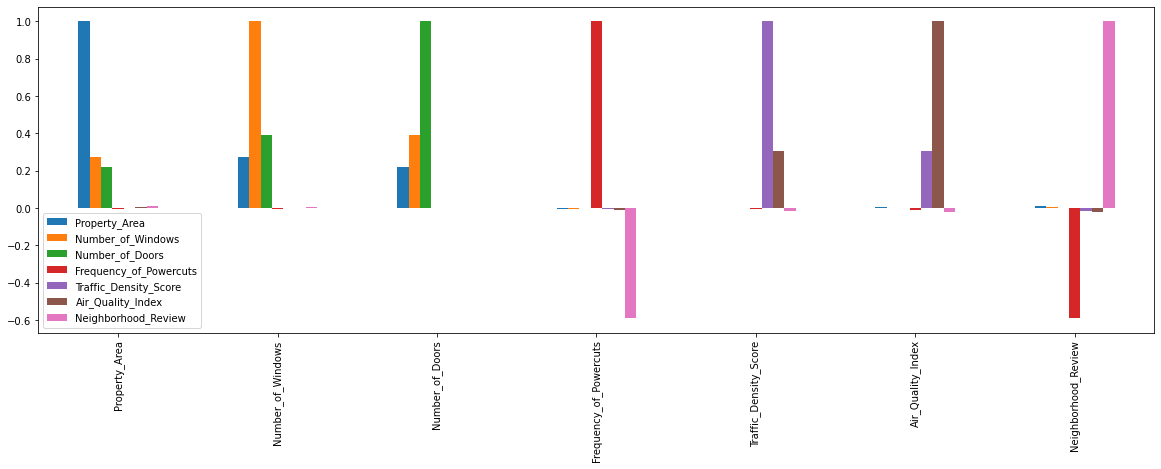

In [14]:
final.corr().plot(kind="bar",figsize=(20,6))

In [15]:
def lore(df,miss):
  from sklearn.linear_model import LogisticRegression
  lr = LogisticRegression()
  lr.fit(df.iloc[:,[1]],df.iloc[:,[0]])
  pred = lr.predict(miss)
  return pred

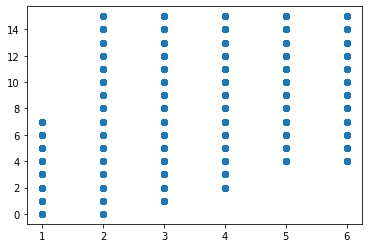

In [16]:
plt.scatter(final["Number_of_Doors"],final["Number_of_Windows"])

In [17]:
ddf = final.iloc[:,[3,4]]
tbs = ddf.loc[ddf["Number_of_Windows"].notnull()]
tp =  ddf.loc[ddf["Number_of_Windows"].isnull()]
ts = tp.iloc[:,1]
pred = lore(tbs,pd.DataFrame(ts))
tp.iloc[:,0]=pred
tp

,Number_of_Windows,Number_of_Doors
0,3.0,1
13,3.0,1
19,4.0,3
29,4.0,5
49,3.0,1
...,...,...
49968,4.0,3
49974,3.0,1
49994,4.0,3
49996,4.0,2


In [18]:
windows_filled = pd.concat([tbs,tp]).sort_index()

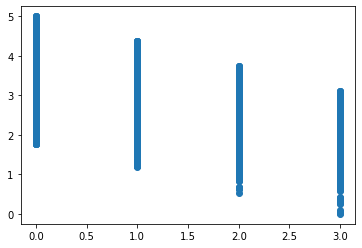

In [19]:
plt.scatter(final.iloc[:,6],final.iloc[:,-1])

In [20]:
ddf = final.iloc[:,[6,-1]]
tbs = ddf.loc[ddf["Frequency_of_Powercuts"].notnull()]
tp =  ddf.loc[ddf["Frequency_of_Powercuts"].isnull()]
ts = tp.iloc[:,1]
pred = lore(tbs,pd.DataFrame(ts))
tp.iloc[:,0]=pred
tp

,Frequency_of_Powercuts,Neighborhood_Review
36,0.0,3.80
58,0.0,4.77
126,0.0,4.17
137,0.0,3.52
151,0.0,4.18
...,...,...
49868,0.0,3.52
49908,0.0,3.47
49909,0.0,4.07
49931,0.0,3.52


In [21]:
fop_filled = pd.concat([tbs,tp]).sort_index()
fop_filled

,Frequency_of_Powercuts,Neighborhood_Review
0,0.0,3.86
1,1.0,3.55
2,0.0,3.81
3,2.0,1.34
4,0.0,4.77
...,...,...
49994,0.0,3.55
49995,3.0,2.90
49996,0.0,4.02
49997,1.0,3.49


In [22]:
for a in final.iloc[:,[5,10,11]]:
  print(final[a].unique())

['Semi_Furnished' 'Unfurnished' 'Fully Furnished' nan]
['Slightly below average' 'Well below average' 'Well above average' nan
 'Slightly above average']
['Medium' nan 'High' 'Low']


In [23]:
final2= final.copy()
a={"Unfurnished":0,"Semi_Furnished":1,"Fully Furnished":2}
final2["Furnishing"]=final2["Furnishing"].map(a)
b={"Well below average":0,"Slightly below average":1,"Slightly above average":2,"Well above average":3}
final2["Crime_Rate"]=final2["Crime_Rate"].map(b)
c={"Low":0,"Medium":1,"High":2}
final2["Dust_and_Noise"]=final2["Dust_and_Noise"].map(c)

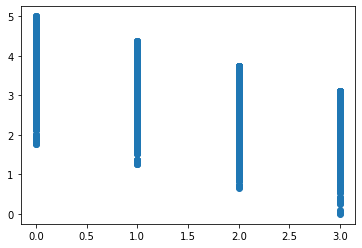

In [24]:
plt.scatter(final2.loc[:,"Crime_Rate"],final2.loc[:,"Neighborhood_Review"])

In [25]:
final2.iloc[:,[10,-1]]

,Crime_Rate,Neighborhood_Review
0,1.0,3.86
1,0.0,3.55
2,1.0,3.81
3,3.0,1.34
4,0.0,4.77
...,...,...
49994,1.0,3.55
49995,0.0,2.90
49996,0.0,4.02
49997,0.0,3.49


In [26]:
ddf = final2.iloc[:,[10,-1]]
tbs = ddf.loc[ddf["Crime_Rate"].notnull()]
tp =  ddf.loc[ddf["Crime_Rate"].isnull()]
ts = tp.iloc[:,1]
pred = lore(tbs,pd.DataFrame(ts))
tp.iloc[:,0]=pred
tp

,Crime_Rate,Neighborhood_Review
6,1.0,2.90
20,0.0,4.19
43,0.0,3.78
85,1.0,3.54
106,0.0,3.74
...,...,...
49731,1.0,2.82
49769,0.0,4.41
49774,0.0,4.80
49797,0.0,4.16


In [27]:
CR_filled = pd.concat([tbs,tp]).sort_index()
CR_filled

,Crime_Rate,Neighborhood_Review
0,1.0,3.86
1,0.0,3.55
2,1.0,3.81
3,3.0,1.34
4,0.0,4.77
...,...,...
49994,1.0,3.55
49995,0.0,2.90
49996,0.0,4.02
49997,0.0,3.49


In [28]:
b={0:"Well below average",1:"Slightly below average",2:"Slightly above average",3:"Well above average"}
CR_filled["Crime_Rate"]=CR_filled["Crime_Rate"].map(b)
CR_filled

,Crime_Rate,Neighborhood_Review
0,Slightly below average,3.86
1,Well below average,3.55
2,Slightly below average,3.81
3,Well above average,1.34
4,Well below average,4.77
...,...,...
49994,Slightly below average,3.55
49995,Well below average,2.90
49996,Well below average,4.02
49997,Well below average,3.49


In [29]:
ddf = final2.iloc[:,[-3,-2]]
tbs = ddf.loc[ddf["Dust_and_Noise"].notnull()]
tp =  ddf.loc[ddf["Dust_and_Noise"].isnull()]
ts = tp.iloc[:,1]
pred = lore(tbs,pd.DataFrame(ts))
tp.iloc[:,0]=pred
tp

,Dust_and_Noise,Air_Quality_Index
8,1.0,94.0
33,1.0,127.0
76,1.0,144.0
159,1.0,87.0
186,1.0,92.0
...,...,...
49930,1.0,96.0
49956,1.0,120.0
49965,1.0,144.0
49970,1.0,144.0


In [30]:
dan_filled=pd.concat([tbs,tp]).sort_index()
dan_filled

,Dust_and_Noise,Air_Quality_Index
0,1.0,90.0
1,1.0,96.0
2,1.0,121.0
3,1.0,100.0
4,1.0,116.0
...,...,...
49994,1.0,94.0
49995,1.0,106.0
49996,2.0,149.0
49997,1.0,131.0


In [31]:
a={0:"Unfurnished",1:"Semi_Furnished",2:"Fully Furnished"}
dan_filled["Dust_and_Noise"]=dan_filled["Dust_and_Noise"].map(a)
dan_filled

,Dust_and_Noise,Air_Quality_Index
0,Semi_Furnished,90.0
1,Semi_Furnished,96.0
2,Semi_Furnished,121.0
3,Semi_Furnished,100.0
4,Semi_Furnished,116.0
...,...,...
49994,Semi_Furnished,94.0
49995,Semi_Furnished,106.0
49996,Fully Furnished,149.0
49997,Semi_Furnished,131.0


In [32]:
f_filled = final.iloc[:,[5]].ffill()

In [33]:
final["Number_of_Windows"]=windows_filled["Number_of_Windows"]
final["Furnishing"]=f_filled["Furnishing"]
final["Crime_Rate"]=CR_filled["Crime_Rate"]
final["Dust_and_Noise"]=dan_filled["Dust_and_Noise"]
final["Frequency_of_Powercuts"]=fop_filled["Frequency_of_Powercuts"]

In [34]:
fin2 = final.iloc[:,[1,5,7,8,10,11]]
fin2 = ohe.fit_transform(fin2)
fin2 = pd.DataFrame(fin2.toarray())

fin3 = final.iloc[:,[2,3,4,6,9,12,13]]
fin3 = sc.fit_transform(fin3)
fin3 = pd.DataFrame(fin3)

final = pd.concat([fin2,fin3],axis=1)

In [35]:
final.columns=[a for a in range(0,len(final.columns))]

In [36]:
train=final[:39499]
test=final[39499:]

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor  
from sklearn.svm import SVR
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [38]:
def regressor1(x_train,x_test,y_train):

    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    
    dtr = DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    y_pred2 = dtr.predict(x_test)
    
    rfr = RandomForestRegressor()
    rfr.fit(x_train,y_train)
    y_pred3 = rfr.predict(x_test)
    
    svr = SVR()
    svr.fit(x_train,y_train)
    y_pred4 = svr.predict(x_test)
    
    r = Ridge()
    r.fit(x_train,y_train)
    y_pred5 = r.predict(x_test)
    
    lasso = Lasso()
    lasso.fit(x_train,y_train)
    y_pred6 = lasso.predict(x_test)
    
    en = ElasticNet()
    en.fit(x_train,y_train)
    y_pred7 = en.predict(x_test)
    return y_pred,y_pred2,y_pred3,y_pred4,y_pred5,y_pred6,y_pred7

In [39]:
p1,p2,p3,p4,p5,p6,p7=regressor1(train,test,y)

COMPARISION BETWEEN REGRESSORS

In [63]:
print("LINEAR REGRESSION")
t2 = pd.read_csv("test.csv")
id = t2.iloc[:,0]
submission = pd.DataFrame({"Property_ID":id,"Habitability_score_pred":p1})
submission.to_csv("App1.csv",index=False)
pd.read_csv("App1.csv")

LINEAR REGRESSION


,Property_ID,Habitability_score_pred
0,0x6e93,43.134766
1,0x8787,75.269531
2,0x6c17,63.386719
3,0x9dbd,70.775391
4,0xbfde,63.722656
...,...,...
10495,0x423d,60.058594
10496,0x78c5,75.603516
10497,0xbf3,79.951172
10498,0x305b,71.027344


In [57]:
print("DECISION TREE REGRESSION")
t2 = pd.read_csv("test.csv")
id = t2.iloc[:,0]
submission = pd.DataFrame({"Property_ID":id,"Habitability_score_pred":p2})
submission.to_csv("App1.csv",index=False)
pd.read_csv("App1.csv")

DECISION TREE REGRESSION


,Property_ID,Habitability_score_pred
0,0x6e93,32.46
1,0x8787,78.81
2,0x6c17,56.63
3,0x9dbd,68.98
4,0xbfde,65.08
...,...,...
10495,0x423d,64.40
10496,0x78c5,90.20
10497,0xbf3,72.37
10498,0x305b,77.12


In [58]:
print("RANDOM FOREST")
t2 = pd.read_csv("test.csv")
id = t2.iloc[:,0]
submission = pd.DataFrame({"Property_ID":id,"Habitability_score_pred":p3})
submission.to_csv("App1.csv",index=False)
pd.read_csv("App1.csv")

RANDOM FOREST


,Property_ID,Habitability_score_pred
0,0x6e93,29.7337
1,0x8787,79.9257
2,0x6c17,65.1705
3,0x9dbd,73.0862
4,0xbfde,76.0044
...,...,...
10495,0x423d,65.0559
10496,0x78c5,81.4591
10497,0xbf3,74.5396
10498,0x305b,79.2233


In [59]:
print("SUPPORT VECTOR MACHINE")
t2 = pd.read_csv("test.csv")
id = t2.iloc[:,0]
submission = pd.DataFrame({"Property_ID":id,"Habitability_score_pred":p4})
submission.to_csv("App1.csv",index=False)
pd.read_csv("App1.csv")

SUPPORT VECTOR MACHINE


,Property_ID,Habitability_score_pred
0,0x6e93,29.697084
1,0x8787,77.342101
2,0x6c17,65.408129
3,0x9dbd,71.993844
4,0xbfde,72.487778
...,...,...
10495,0x423d,56.385749
10496,0x78c5,76.835897
10497,0xbf3,73.822631
10498,0x305b,74.964296


In [60]:
print("RIDGE REGRESSION")
t2 = pd.read_csv("test.csv")
id = t2.iloc[:,0]
submission = pd.DataFrame({"Property_ID":id,"Habitability_score_pred":p5})
submission.to_csv("App1.csv",index=False)
pd.read_csv("App1.csv")

RIDGE REGRESSION


,Property_ID,Habitability_score_pred
0,0x6e93,43.390138
1,0x8787,75.439598
2,0x6c17,62.952244
3,0x9dbd,70.719474
4,0xbfde,63.975002
...,...,...
10495,0x423d,59.975093
10496,0x78c5,75.837436
10497,0xbf3,80.041276
10498,0x305b,71.199951


In [61]:
print("LASSO REGRESSION")
t2 = pd.read_csv("test.csv")
id = t2.iloc[:,0]
submission = pd.DataFrame({"Property_ID":id,"Habitability_score_pred":p6})
submission.to_csv("App1.csv",index=False)
pd.read_csv("App1.csv")

LASSO REGRESSION


,Property_ID,Habitability_score_pred
0,0x6e93,56.841235
1,0x8787,78.145045
2,0x6c17,67.461116
3,0x9dbd,71.992873
4,0xbfde,67.802977
...,...,...
10495,0x423d,65.532050
10496,0x78c5,70.614794
10497,0xbf3,77.631292
10498,0x305b,68.106695


In [62]:
print("ELASTIC NET REGRESSION")
t2 = pd.read_csv("test.csv")
id = t2.iloc[:,0]
submission = pd.DataFrame({"Property_ID":id,"Habitability_score_pred":p7})
submission.to_csv("App1.csv",index=False)
pd.read_csv("App1.csv")

ELASTIC NET REGRESSION


,Property_ID,Habitability_score_pred
0,0x6e93,62.315300
1,0x8787,75.717866
2,0x6c17,68.041333
3,0x9dbd,70.540046
4,0xbfde,69.475563
...,...,...
10495,0x423d,69.476498
10496,0x78c5,70.455493
10497,0xbf3,77.526257
10498,0x305b,71.610064
